In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append(os.path.abspath('../'))

import warnings
warnings.filterwarnings("ignore")

from server2022.src.train_val import *
from server2022.src.model_features import *
from server2022.data.processed.prepare_data import *


OUTPUT_FILE = '../reports/report_1_binary_target.csv'

TARGET_DICT = {'1': 'binary_target', '2': 'target_more30days', '3': 'target_more90days'}
'''Choose target: 
    1 - binary_target
    2 - target_more30days
    3 - target_more90days
'''
TARGET_COL = TARGET_DICT['1'] # TARGET_DICT[input()]

### All features

In [2]:
df = create_df_1year_known(normalize_fin_columns=False)

In [3]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df)

In [4]:
df.head(3)

,Наименование ДП,Факт. 29,Факт. 31,Факт. 39,Факт. 49,Факт. 51,Факт. 54,Факт. 58,Факт. 59,Факт. 60,Итого,"-4, Нематериальные активы, RUB","-3, Нематериальные активы, RUB","-2, Нематериальные активы, RUB","-1, Нематериальные активы, RUB","-4, Основные средства , RUB","-3, Основные средства , RUB","-2, Основные средства , RUB","-1, Основные средства , RUB","-4, Внеоборотные активы, RUB","-3, Внеоборотные активы, RUB","-2, Внеоборотные активы, RUB","-1, Внеоборотные активы, RUB","-4, Дебиторская задолженность, RUB","-3, Дебиторская задолженность, RUB","-2, Дебиторская задолженность, RUB","-1, Дебиторская задолженность, RUB","-4, Оборотные активы, RUB","-3, Оборотные активы, RUB","-2, Оборотные активы, RUB","-1, Оборотные активы, RUB","-4, Уставный капитал , RUB","-3, Уставный капитал , RUB","-2, Уставный капитал , RUB","-1, Уставный капитал , RUB","-4, Капитал и резервы, RUB","-3, Капитал и резервы, RUB","-2, Капитал и резервы, RUB","-1, Капитал и резервы, RUB","-4, Заёмные средства (долгосрочные), RUB","-3, Заёмные средства (долгосрочные), RUB","-2, Заёмные средства (долгосрочные), RUB","-1, Заёмные средства (долгосрочные), RUB","-4, Долгосрочные обязательства, RUB","-3, Долгосрочные обязательства, RUB","-2, Долгосрочные обязательства, RUB","-1, Долгосрочные обязательства, RUB","-4, Заёмные средства (краткосрочные), RUB","-3, Заёмные средства (краткосрочные), RUB","-2, Заёмные средства (краткосрочные), RUB","-1, Заёмные средства (краткосрочные), RUB","-4, Кредиторская задолженность, RUB","-3, Кредиторская задолженность, RUB","-2, Кредиторская задолженность, RUB","-1, Кредиторская задолженность, RUB","-4, Краткосрочные обязательства, RUB","-3, Краткосрочные обязательства, RUB","-2, Краткосрочные обязательства, RUB","-1, Краткосрочные обязательства, RUB","-4, Выручка, RUB","-3, Выручка, RUB","-2, Выручка, RUB","-1, Выручка, RUB","-4, Себестоимость продаж, RUB","-3, Себестоимость продаж, RUB","-2, Себестоимость продаж, RUB","-1, Себестоимость продаж, RUB","-4, Прибыль (убыток) до налогообложения , RUB","-3, Прибыль (убыток) до налогообложения , RUB","-2, Прибыль (убыток) до налогообложения , RUB","-1, Прибыль (убыток) до налогообложения , RUB","-4, Прибыль (убыток) от продажи, RUB","-3, Прибыль (убыток) от продажи, RUB","-2, Прибыль (убыток) от продажи, RUB","-1, Прибыль (убыток) от продажи, RUB",year,binary_target,target_more30days,target_more90days,"Макс. ПДЗ за -1 год, дней","Сред. ПДЗ за -1 год, дней","Кол-во просрочек свыше 5-ти дней за -1 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.","Кол-во раз ПДЗ за -1 год, шт.",Нематериальные активы total mean growth,Основные средства total mean growth,Внеоборотные активы total mean growth,Дебиторская задолженность total mean growth,Оборотные активы total mean growth,Уставный капитал total mean growth,Капитал и резервы total mean growth,Заёмные средства (долгосрочные) total mean growth,Долгосрочные обязательства total mean growth,Заёмные средства (краткосрочные) total mean growth,Кредиторская задолженность total mean growth,Краткосрочные обязательства total mean growth,Выручка total mean growth,Себестоимость продаж total mean growth,Прибыль (убыток) до налогообложения total mean growth,Прибыль (убыток) от продажи total mean growth,"log -4, Нематериальные активы, RUB","log -3, Нематериальные активы, RUB","log -2, Нематериальные активы, RUB","log -1, Нематериальные активы, RUB","log -4, Основные средства , RUB","log -3, Основные средства , RUB","log -2, Основные средства , RUB","log -1, Основные средства , RUB","log -4, Внеоборотные активы, RUB","log -3, Внеоборотные активы, RUB","log -2, Внеоборотные активы, RUB","log -1, Внеоборотные активы, RUB","log -4, Дебиторская задолженность, RUB","log -3, Дебиторская задолженность, RUB","log -2, Дебиторская задолженность, RUB","log -1, Дебиторская задолженность, RUB","log -4, Оборотные активы, RUB","log -3, Оборотные активы, RUB","log -2, Оборотные активы, RUB","log -1, Оборотные активы, RUB","log -4, Уставный капитал , RUB","log -3, У

In [5]:
# for 30_days {'depth': 4.0, 'l2_leaf_reg': 8.836237522928192, 'learning_rate': 0.019172380484543887}

model = CatBoostClassifier(iterations=500,
                               depth=5, 
                               l2_leaf_reg=5, 
                               learning_rate=0.001, # 0.01433
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.01], #0.0006
                               random_seed=100, #RANDOM_STATE,
                              )

# TEST: F1 = 0.644, Precision = 0.619, Recall = 0.67, Accuracy = 0.741, ROC_AUC = 0.794
# TEST: F1 = 0.663, Precision = 0.657, Recall = 0.67, Accuracy = 0.763, ROC_AUC = 0.806

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001AE1AB1C430> with threshold = 0.20448...


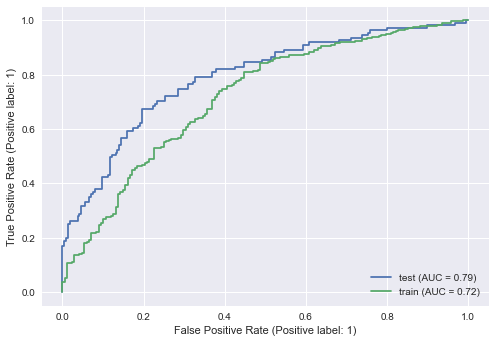

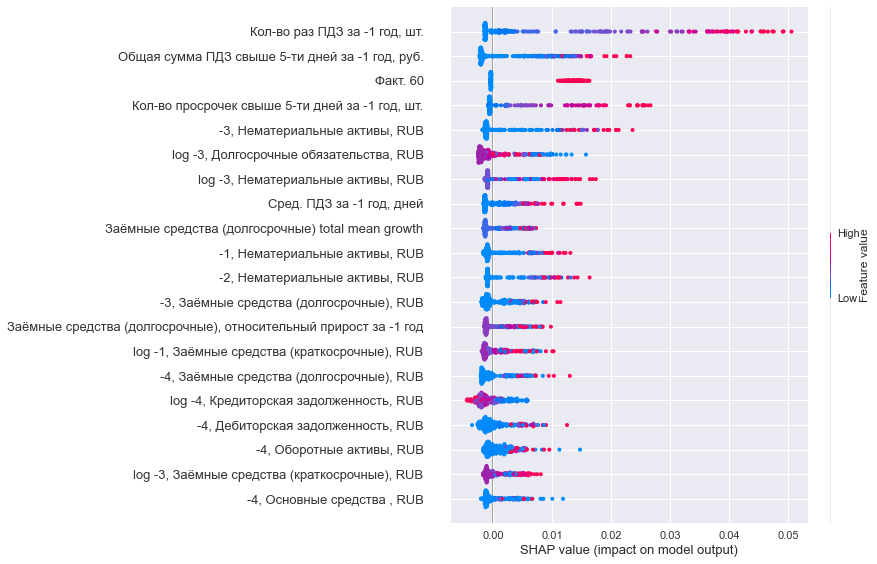


TRAIN: F1 = 0.547, Precision = 0.845, Recall = 0.405, Accuracy = 0.542, ROC_AUC = 0.718
TEST: F1 = 0.646, Precision = 0.559, Recall = 0.766, Accuracy = 0.714, ROC_AUC = 0.79



In [6]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='normalize_fin_columns=False')

## All features, drop_zeros=False

In [7]:
df = create_df_1year_known(normalize_fin_columns=False, drop_zeros=False)

In [8]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001C603BB8E20> with threshold = 0.20976...


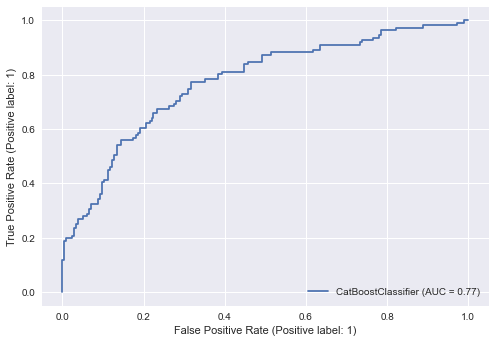

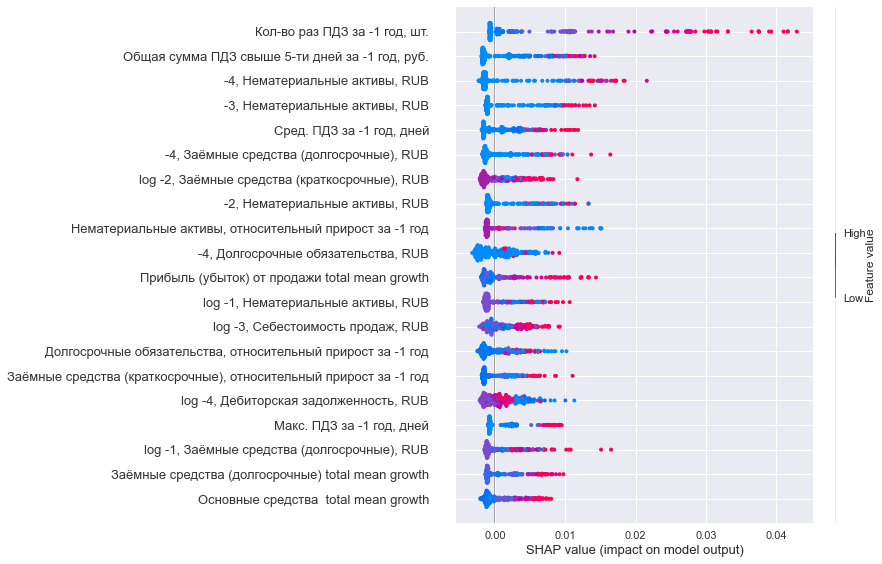


TRAIN: F1 = 0.403, Precision = 0.822, Recall = 0.267, Accuracy = 0.46, ROC_AUC = 0.705
TEST: F1 = 0.594, Precision = 0.659, Recall = 0.541, Accuracy = 0.748, ROC_AUC = 0.774



In [9]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='All features, drop_zeros=False')

## No features

In [10]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [11]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001C603BB8E20> with threshold = 0.20929...


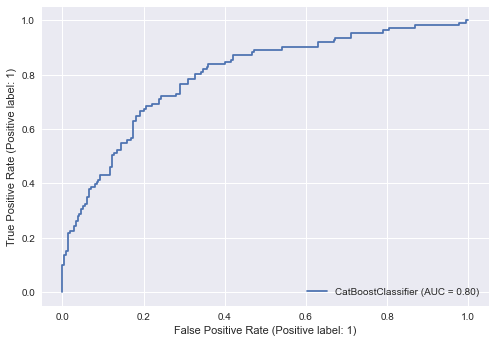

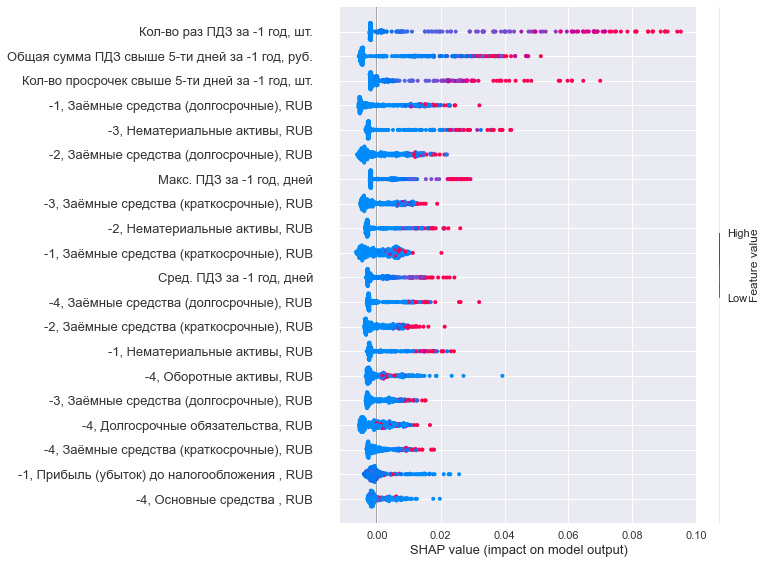


TRAIN: F1 = 0.479, Precision = 0.836, Recall = 0.336, Accuracy = 0.501, ROC_AUC = 0.684
TEST: F1 = 0.648, Precision = 0.588, Recall = 0.721, Accuracy = 0.732, ROC_AUC = 0.798



In [12]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='no_features')

## drop_zeros=True

In [13]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=True)

In [14]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001C603BB8E20> with threshold = 0.20467...


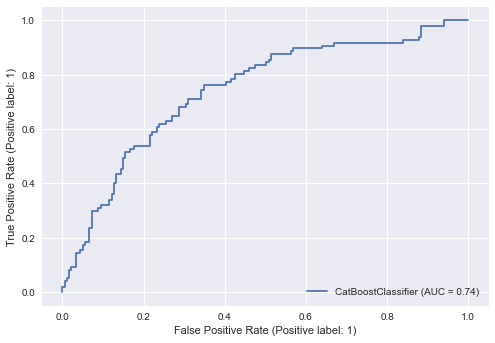

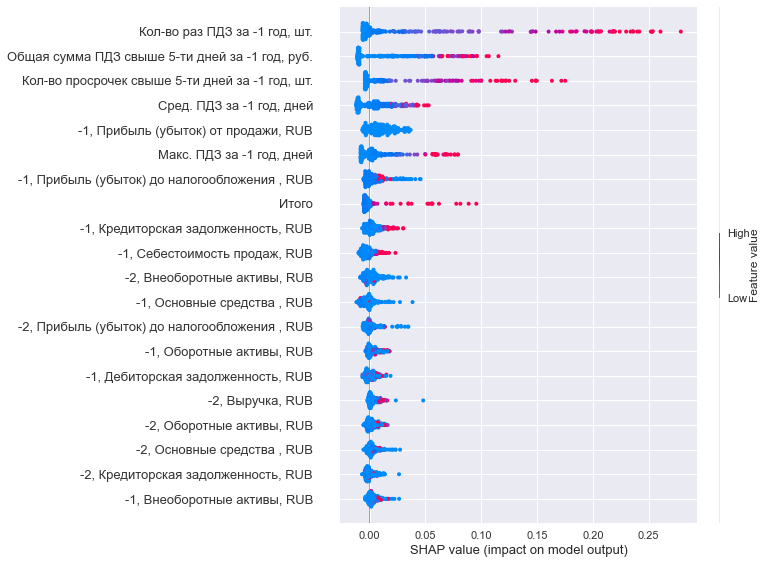


TRAIN: F1 = 0.518, Precision = 0.84, Recall = 0.375, Accuracy = 0.518, ROC_AUC = 0.674
TEST: F1 = 0.63, Precision = 0.536, Recall = 0.763, Accuracy = 0.687, ROC_AUC = 0.742



In [15]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='drop_zeros=True')

## use_diff_features=True

In [16]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [17]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001C603BB8E20> with threshold = 0.20795...


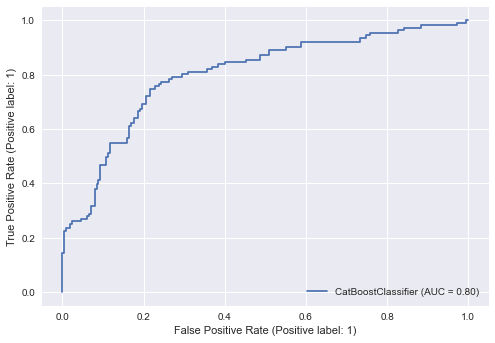

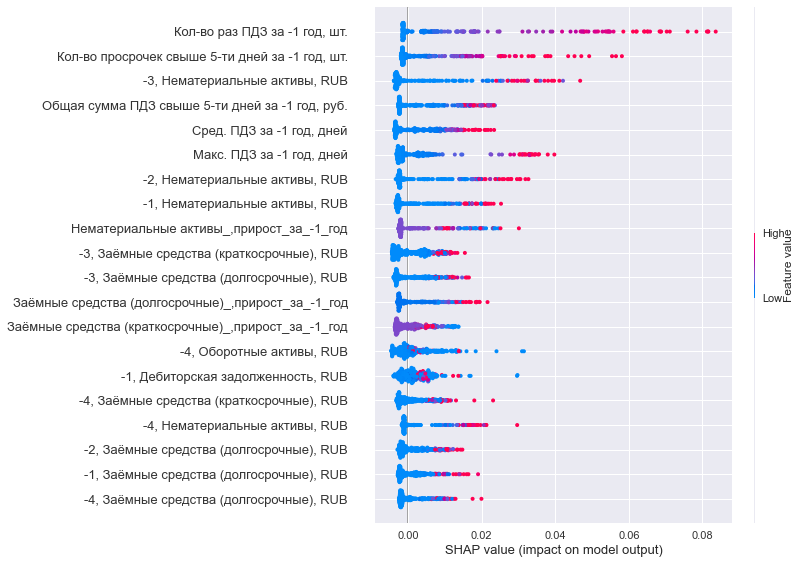


TRAIN: F1 = 0.49, Precision = 0.834, Recall = 0.347, Accuracy = 0.507, ROC_AUC = 0.684
TEST: F1 = 0.683, Precision = 0.629, Recall = 0.748, Accuracy = 0.763, ROC_AUC = 0.801



In [18]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='use_diff_features=True')

## use_ratio_features=True

In [19]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [20]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=True)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001C603BB8E20> with threshold = 0.21108...


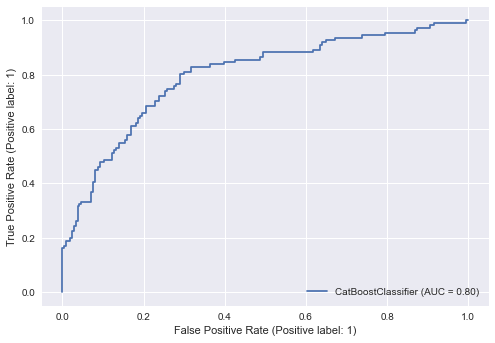

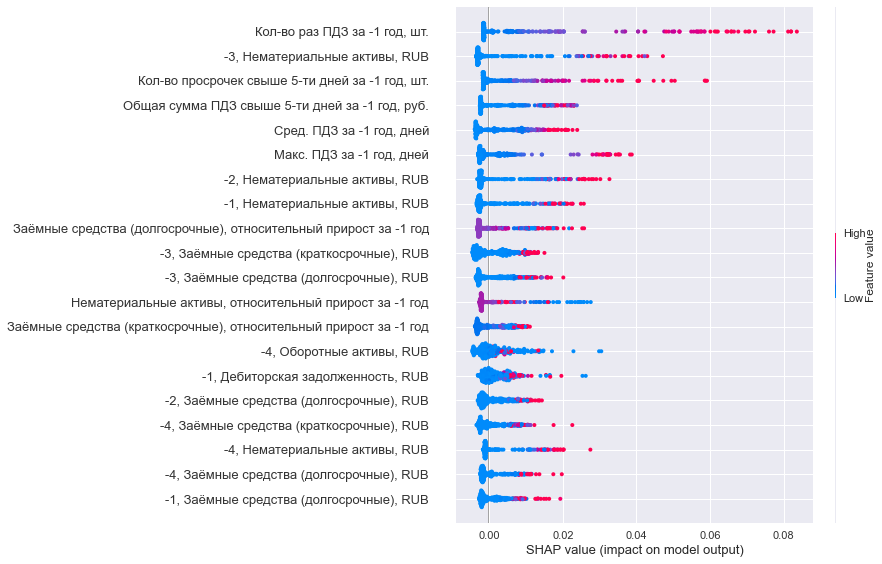


TRAIN: F1 = 0.427, Precision = 0.839, Recall = 0.287, Accuracy = 0.475, ROC_AUC = 0.7
TEST: F1 = 0.643, Precision = 0.629, Recall = 0.658, Accuracy = 0.751, ROC_AUC = 0.798



In [21]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='use_ratio_features=True')

## add_growth=True

In [22]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [23]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001C603BB8E20> with threshold = 0.20979...


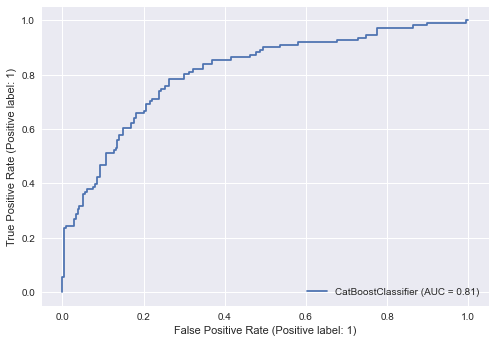

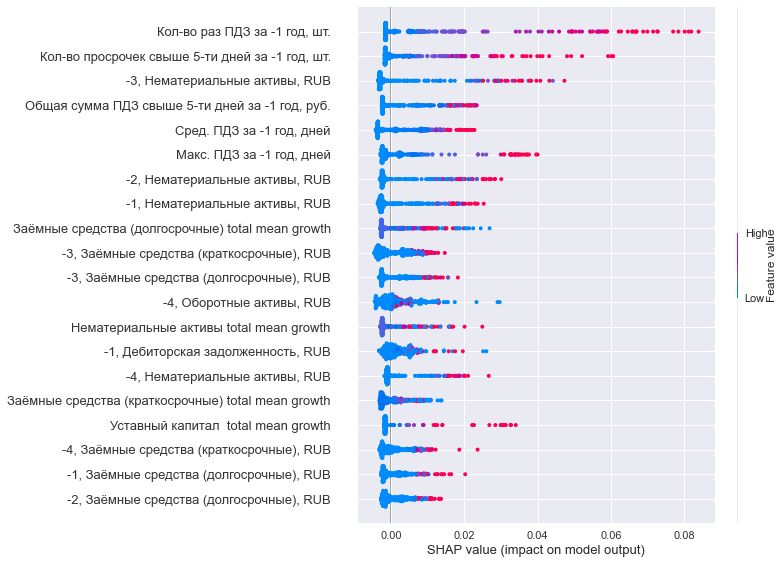


TRAIN: F1 = 0.453, Precision = 0.855, Recall = 0.309, Accuracy = 0.492, ROC_AUC = 0.697
TEST: F1 = 0.658, Precision = 0.626, Recall = 0.694, Accuracy = 0.754, ROC_AUC = 0.809



In [24]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='add_growth=True')

## count_log_fin_vals=True

In [25]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=True, normalize_fin_columns=False, drop_zeros=False)

In [26]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001C603BB8E20> with threshold = 0.20707...


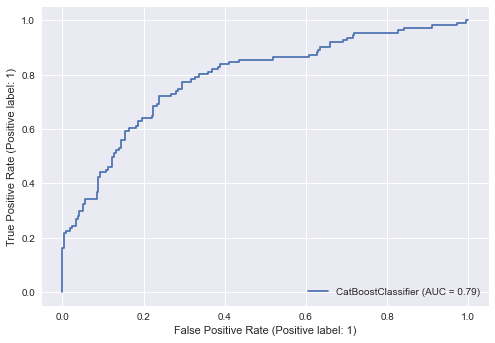

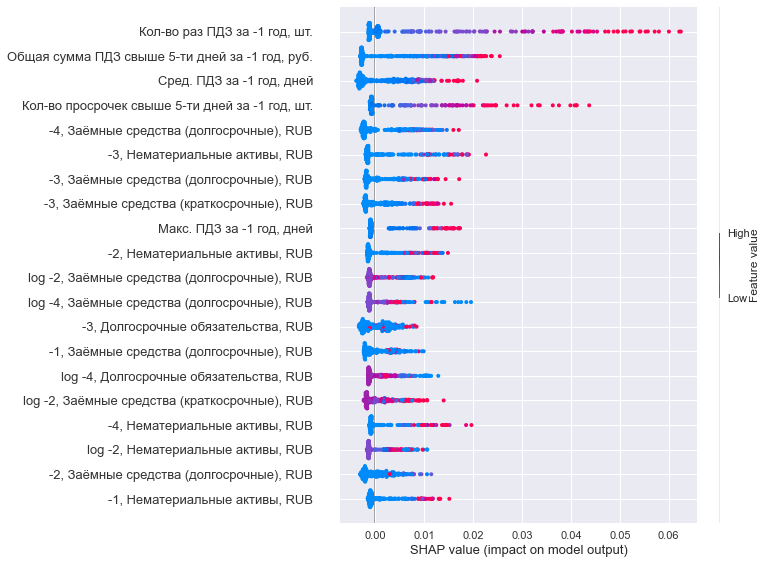


TRAIN: F1 = 0.452, Precision = 0.825, Recall = 0.311, Accuracy = 0.484, ROC_AUC = 0.69
TEST: F1 = 0.628, Precision = 0.617, Recall = 0.64, Accuracy = 0.742, ROC_AUC = 0.788



In [27]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='count_log_fin_vals=True')

## normalize_fin_columns=True

In [28]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=True, drop_zeros=False)

In [29]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000001C603BB8E20> with threshold = 0.20907...


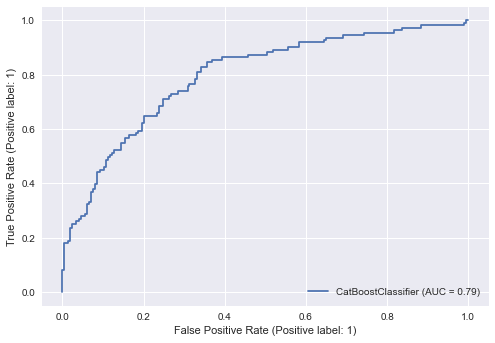

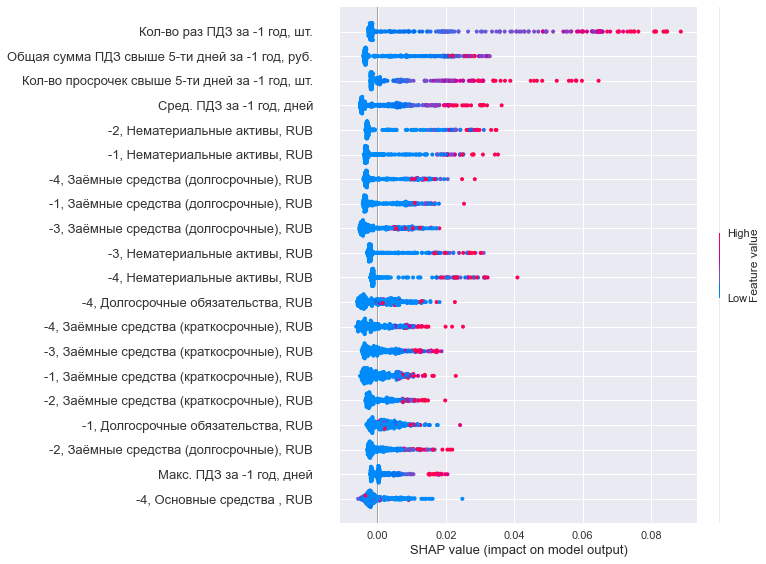


TRAIN: F1 = 0.495, Precision = 0.831, Recall = 0.353, Accuracy = 0.508, ROC_AUC = 0.688
TEST: F1 = 0.651, Precision = 0.587, Recall = 0.73, Accuracy = 0.732, ROC_AUC = 0.795



In [30]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=10,
                                file_path=OUTPUT_FILE, comment='normalize_fin_columns=True')